In [1]:
ls data


08-17-29.jpg  08-22-41.jpg  08-27-52.jpg


In [2]:
# Import Libraries 
from plantcv import plantcv as pcv

import cv2
import os
from glob import glob
import numpy as np
%matplotlib inline

In [3]:
dir = os.path.join("data", "*.jpg")
file_list = [file for file in glob(dir)]
print(file_list)

['data/08-22-41.jpg', 'data/08-17-29.jpg', 'data/08-27-52.jpg']


In [4]:
file_list[0]

'data/08-22-41.jpg'

In [5]:
class options:
    def __init__(self):
        self.image = file_list[1]
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        self.background = file_list[0]
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


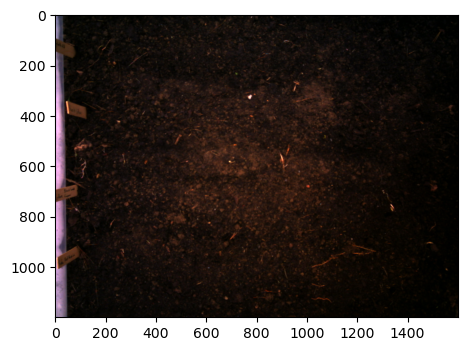

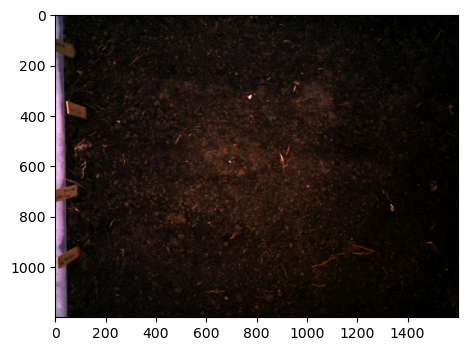

In [6]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)
img_b, path_b, filename_b = pcv.readimage(filename=args.background)

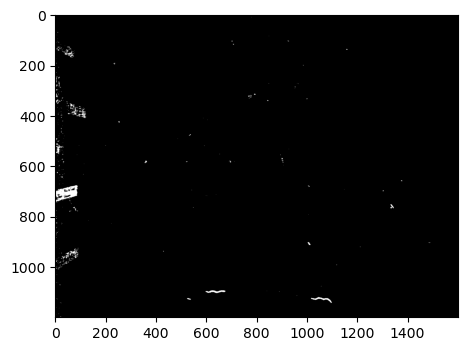

In [7]:
bg = pcv.background_subtraction(img,img_b)

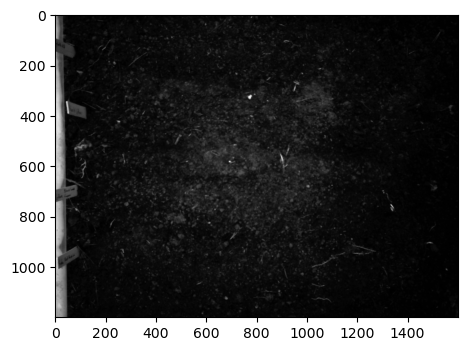

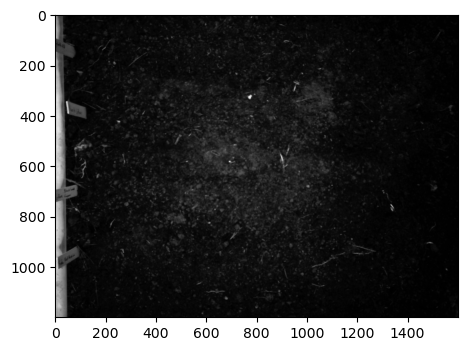

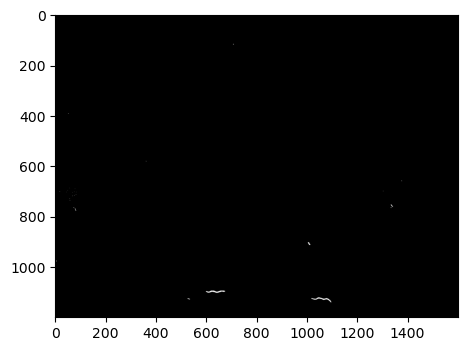

In [8]:
l = pcv.rgb2gray_lab(rgb_img=img, channel='l')
lback = pcv.rgb2gray_lab(rgb_img=img_b, channel='l')
lsub = pcv.background_subtraction(l,lback)

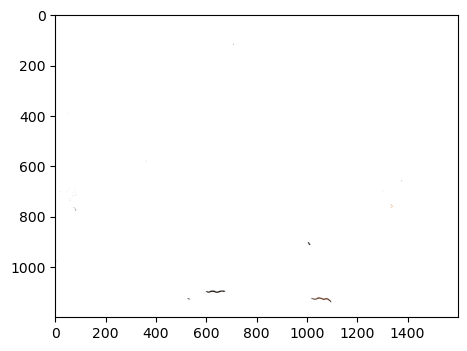

In [9]:
# Appy Mask (for VIS images, mask_color='white')

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
masked = pcv.apply_mask(img=img, mask=lsub, mask_color='white')


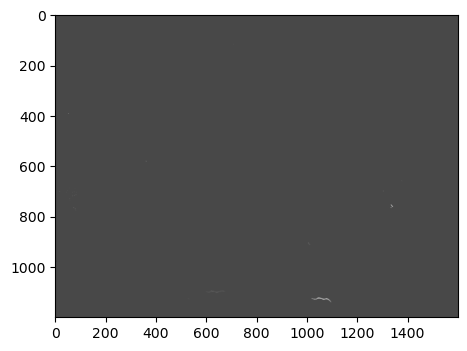

In [10]:
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

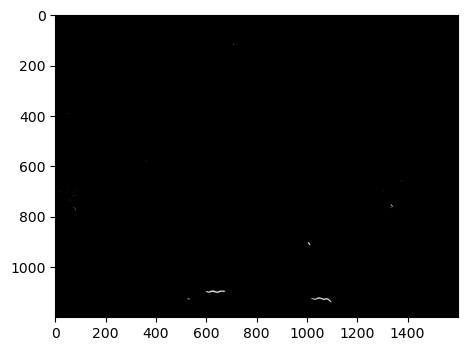

In [11]:
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')


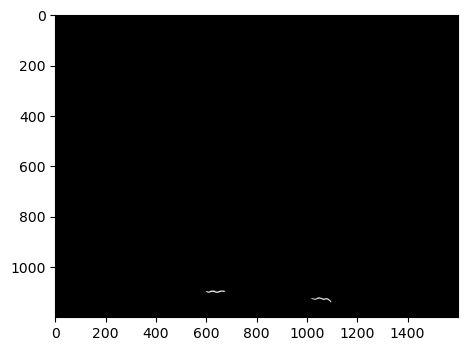

In [12]:
ab_fill = pcv.fill(bin_img=maskedb_thresh, size=150)


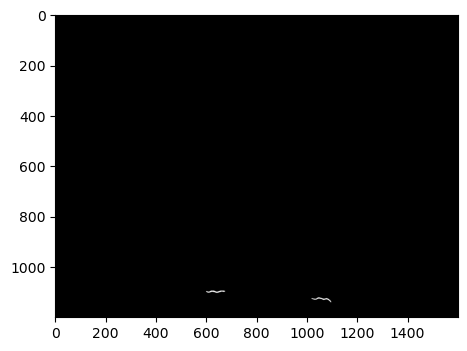

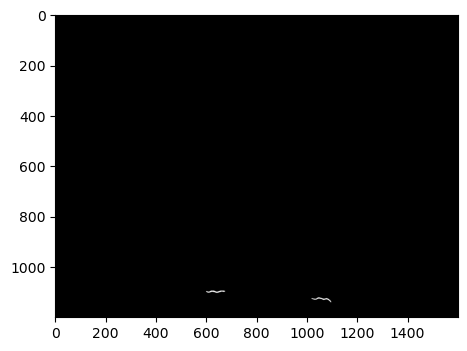

In [13]:
# Opening filters out bright noise from an image.

# Inputs:
#   gray_img - Grayscale or binary image data
#   kernel - Optional neighborhood, expressed as an array of 1's and 0's. If None (default),
#   uses cross-shaped structuring element.
opened_ab = pcv.opening(gray_img=ab_fill)

closed_ab = pcv.closing(gray_img=opened_ab)


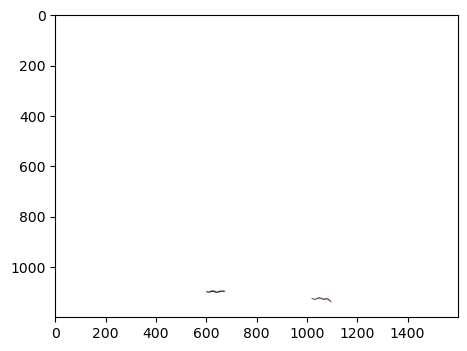

In [14]:
# Apply mask (for VIS images, mask_color=white)
masked2 = pcv.apply_mask(img=masked, mask=closed_ab, mask_color='white')


Now we need to identify the objects (also called contours) within the image 

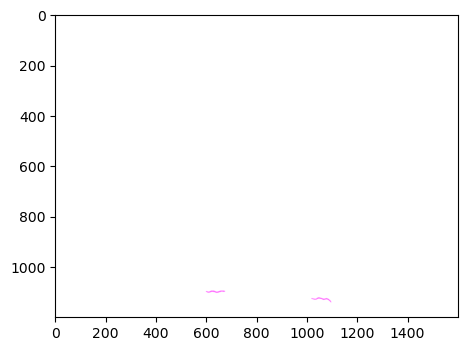

In [15]:
# Identify objects

# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)


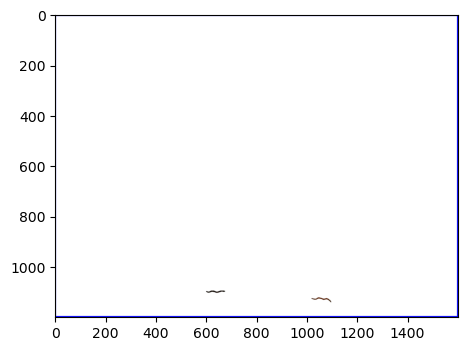

In [16]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=0, y=0, h=1200, w=1600)

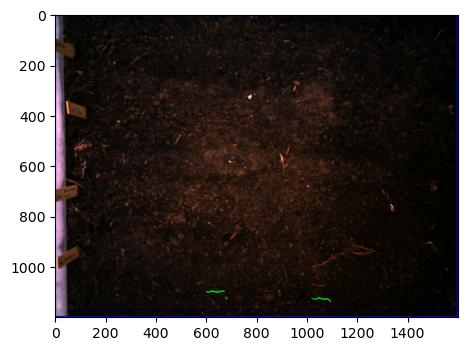

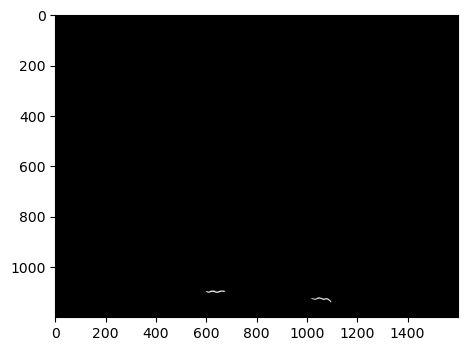

In [17]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')


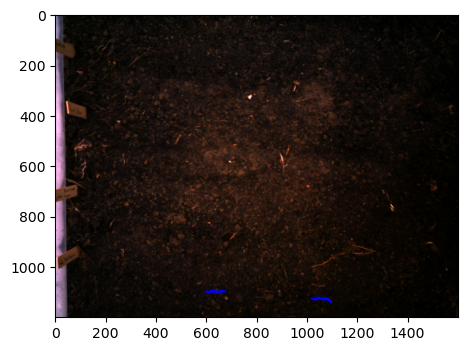

In [18]:
# Object combine kept objects

# Inputs:
#   img - RGB or grayscale image data for plotting 
#   contours - Contour list 
#   hierarchy - Contour hierarchy array 
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)


In [22]:
output  = cv2.drawContours(img, obj, -1,(0,0,255),thickness=1 )


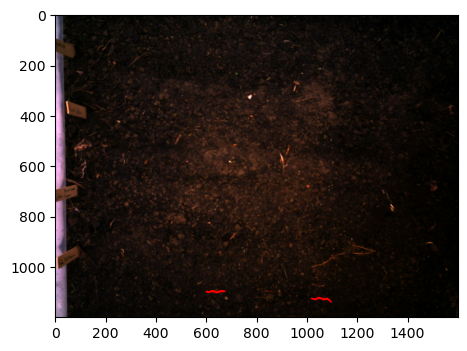

In [23]:
pcv.plot_image(output)

In [21]:
#save img plus object contour?
#pcv.print_image(output, "./output.jpg")